In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from textblob import TextBlob

In [84]:
path = 'put your path here/TheLastOfUs_english.csv'
df = pd.read_csv(path)
df.head()

,id,author_id,text,created_at,like_count,retweet_count,reply_count,impression_count,quote_count
0,1618476065491652608,1523192548033974272,[#thelastofus #tlou #thelastofushbo]\n-\n-\ni ...,2023-01-26 05:08:58+00:00,0,0,0,16,0
1,1618472894635610116,1331935307227230210,The beauty of episode 2 🔥\n#TheLastOfUs #TheLa...,2023-01-26 04:56:22+00:00,0,0,0,38,0
2,1618472517911605248,4572075855,My REACTION to Episode 2 of #TheLastOfUs #TheL...,2023-01-26 04:54:52+00:00,2,0,0,33,0
3,1618472334284967936,1481656063808077829,Marlene and Ellie #tlou #TheLastOfUs #TheLastO...,2023-01-26 04:54:08+00:00,0,0,0,21,0
4,1618464044733845504,1591050348013228034,Thank you for the Indonesian representation!\n...,2023-01-26 04:21:12+00:00,0,0,0,31,0


In [85]:
df = df.drop(['created_at','like_count','retweet_count','reply_count','impression_count','quote_count','id','author_id'], axis = 1)
df.head()

,text
0,[#thelastofus #tlou #thelastofushbo]\n-\n-\ni ...
1,The beauty of episode 2 🔥\n#TheLastOfUs #TheLa...
2,My REACTION to Episode 2 of #TheLastOfUs #TheL...
3,Marlene and Ellie #tlou #TheLastOfUs #TheLastO...
4,Thank you for the Indonesian representation!\n...


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5705 entries, 0 to 5704
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5705 non-null   object
dtypes: object(1)
memory usage: 44.7+ KB


In [87]:
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('punkt')

from nltk.tokenize import word_tokenize

stopword_aing = []
with open('put your path here/stopwords-en.txt', 'r') as f:
  for line in f:
    stopword_aing.append(line.strip())
sw = stopwords.words('english')
sw.extend(stopword_aing)

def cleaning_data(text):
  text = text.lower()
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'@\w+', '', text)
  text = text.replace('\n', ' ')
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
  text = re.sub(r'[^a-zA-Z0-9]+', ' ', text)
  text = re.sub(r'\d+', '', text)
  text = ' '.join([word for word in text.split() if word not in sw])
  text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
  return text

df['text'] = df['text'].apply(lambda x: cleaning_data(x))
df = df[df['text'].str.strip() != '']

df.head(100)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text
0,edit feeling lazy simple
1,beauty
2,reaction share favorite criticism
4,indonesian representation solid
6,finally watching episode binge insanely disgus...
...,...
102,watched series series capture spirit game reco...
103,upload playing left dlc remake check subscribe
104,lost darkness light
105,badass loving


In [88]:
def calc_sentiment(text):
  sentiment = TextBlob(text).sentiment.polarity
  return sentiment

df['sentiment'] = df['text'].apply(calc_sentiment)

# df["sentiment_label"] = "Neutral"
# df.loc[df["sentiment"] < 0, "sentiment_label"] = "Negative"
# df.loc[df["sentiment"] > 0, "sentiment_label"] = "Positive"

df["sentiment_label"] = "Neutral"

for i, row in df.iterrows():
    if row["sentiment"] < 0:
        df.at[i, "sentiment_label"] = "Negative"
    elif row["sentiment"] > 0:
        df.at[i, "sentiment_label"] = "Positive"

df.head(100)

,text,sentiment,sentiment_label
0,edit feeling lazy simple,-0.125,Negative
1,beauty,0.000,Neutral
2,reaction share favorite criticism,0.500,Positive
4,indonesian representation solid,0.000,Neutral
6,finally watching episode binge insanely disgus...,0.500,Positive
...,...,...,...
102,watched series series capture spirit game reco...,-0.400,Negative
103,upload playing left dlc remake check subscribe,0.000,Neutral
104,lost darkness light,0.400,Positive
105,badass loving,0.600,Positive


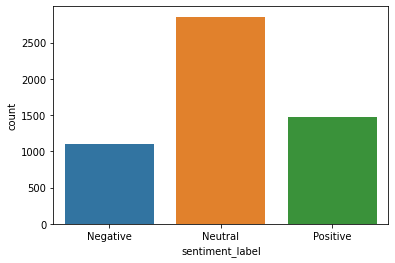

In [89]:
sns.countplot(x=df['sentiment_label'])

In [90]:
# def tokenize_text(text):
#     return word_tokenize(text)

# df['text'] = df['text'].apply(tokenize_text)

In [91]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer()
X = cv.fit_transform(df['text'])
features = cv.get_feature_names()
X = X.toarray()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [92]:
y = df['sentiment_label']

In [93]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 11)
X_resampled, y_resampled = ros.fit_resample(X, y)

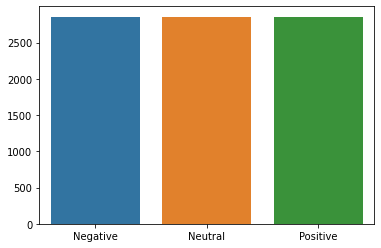

In [94]:
df_resampled = pd.DataFrame({'text': X_resampled.tolist(), 'label': y_resampled})
class_count = df_resampled['label'].value_counts()
sns.barplot(x=class_count.index, y=class_count.values)
plt.show()

In [95]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# sentiments_encoded = le.fit_transform(y)

In [96]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X_resampled, y_resampled, test_size=0.2, random_state=11)

In [97]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [98]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier(random_state=11)

In [99]:
model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob', random_state=11)

In [100]:
y_pred = model.predict(X_test)

In [101]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 79.83%


In [102]:
df_resampled.head()

,text,label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Negative
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Neutral
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positive
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Neutral
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positive


In [124]:
input_string = 'fuck you'
input_string = cleaning_data(input_string)
# print(input_string)

input_string = cv.transform([input_string]).toarray()

prediction = model.predict(input_string)
print("hasil prediksi", prediction)

hasil prediksi ['Negative']


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300, 400]
}

# Create a XGBoost classifier object
xgb_clf = xgb.XGBClassifier(random_state=11)

# Create a grid search object
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a new XGBoost model with the best hyperparameters
xgb_clf_best = xgb.XGBClassifier(**best_params, random_state=11)
xgb_clf_best.fit(X_train, y_train)

# Evaluate the new model on the test data
y_pred = xgb_clf_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after tuning: {:.2f}%".format(accuracy * 100))

KeyboardInterrupt: ignored

In [ ]:
# !pip install tpot

In [ ]:
# from tpot import TPOTClassifier
# from sklearn.model_selection import RepeatedStratifiedKFold

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# model = TPOTClassifier(generations=5, population_size=20, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)

# model.fit(X_train, y_train)
# score = model.score(X_test, y_test)
# print('Test accuracy: ', score)
# model.export('tpot_exported_pipeline.py')